In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from catboost import CatBoostClassifier
from matplotlib import pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [2]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

In [3]:
data = pd.read_csv('./train.csv')
X_test = pd.read_csv('./test.csv')

In [4]:
# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [5]:
data.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


In [6]:
data.shape

(5282, 20)

In [7]:
data.dtypes

ClientPeriod                  int64
MonthlySpending             float64
TotalSpent                   object
Sex                          object
IsSeniorCitizen               int64
HasPartner                   object
HasChild                     object
HasPhoneService              object
HasMultiplePhoneNumbers      object
HasInternetService           object
HasOnlineSecurityService     object
HasOnlineBackup              object
HasDeviceProtection          object
HasTechSupportAccess         object
HasOnlineTV                  object
HasMovieSubscription         object
HasContractPhone             object
IsBillingPaperless           object
PaymentMethod                object
Churn                         int64
dtype: object

Посмотрим на одинаковые строки

In [8]:
print(f"Одинаковые строки: {data.duplicated(keep=False).sum()}")
print(f"Одинаковые строки без Churn: {data.drop(target_col, axis=1).duplicated(keep=False).sum()}")

Одинаковые строки: 28
Одинаковые строки без Churn: 41


In [9]:
data[data.drop(target_col, axis=1).duplicated(keep=False)].sort_values(by=[*data.columns])

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
838,1,19.65,19.65,Female,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,0
1636,1,19.65,19.65,Female,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,0
4811,1,19.65,19.65,Female,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,1
3463,1,19.75,19.75,Male,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,0
4294,1,19.75,19.75,Male,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,1
3831,1,20.00,20,Male,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,0
1647,1,20.00,20,Male,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,1
594,1,20.05,20.05,Male,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,0
1474,1,20.05,20.05,Male,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,0
3735,1,20.20,20.2,Male,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,0


Что можно заметить, они были "свободны" (нет партнеров и детей), практически не использовали различныке сервисы, ну и ClientPeriod = 1

PS 
изначально думал, что клиентов с одинаковыми характеристиками будет больше и можно будет обнаружить какую-нибудь явную зависимость и двигаться от нее. Но пока однозначного в голову ничего не приходит, если есть идет поддкиньте в комментариях буду благодарен))), возможно доработаю... а пока движемся дальше по заданию

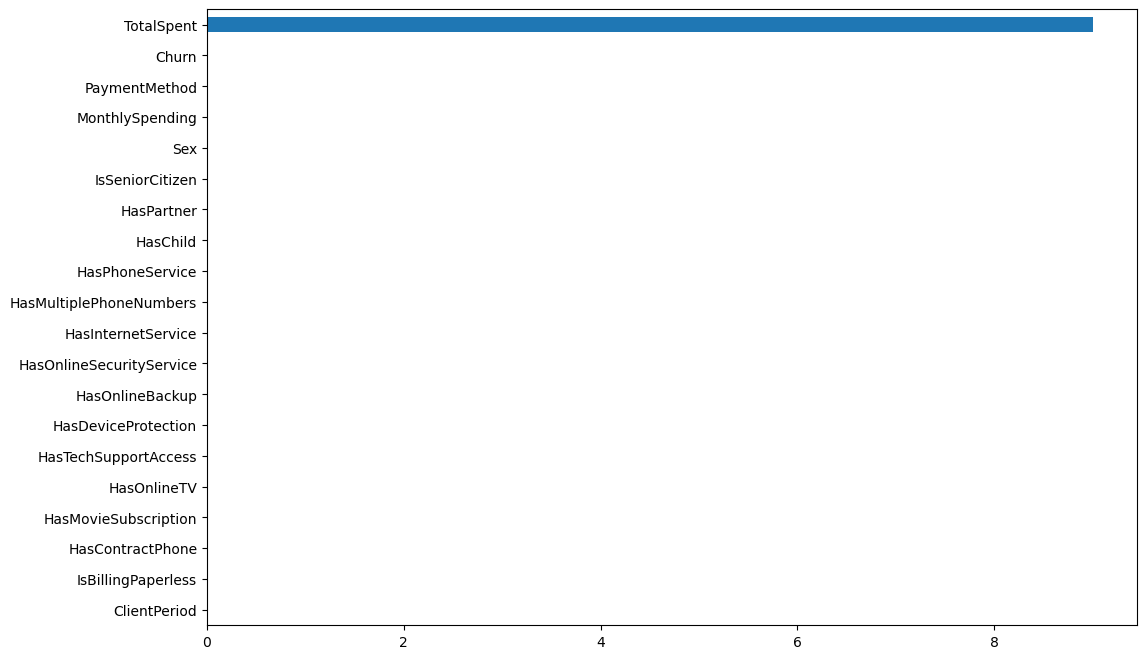

In [10]:
data.replace(" ", np.nan, inplace=True)
X_test.replace(" ", np.nan, inplace=True)
pd.DataFrame(data.isna().sum(), columns=["NaN Count"]).sort_values("NaN Count").plot(kind="barh", legend=False, figsize=(12, 8));

В столбце TotalSpent 9 нанов. Это новые клиенты которые еще не внесли платеж, заполним их нулями

In [11]:
data["TotalSpent"] = data.TotalSpent.fillna(0).astype(float)
X_test["TotalSpent"] = X_test.TotalSpent.fillna(0).astype(float)

In [12]:
X_train = data
y_train = data['Churn']

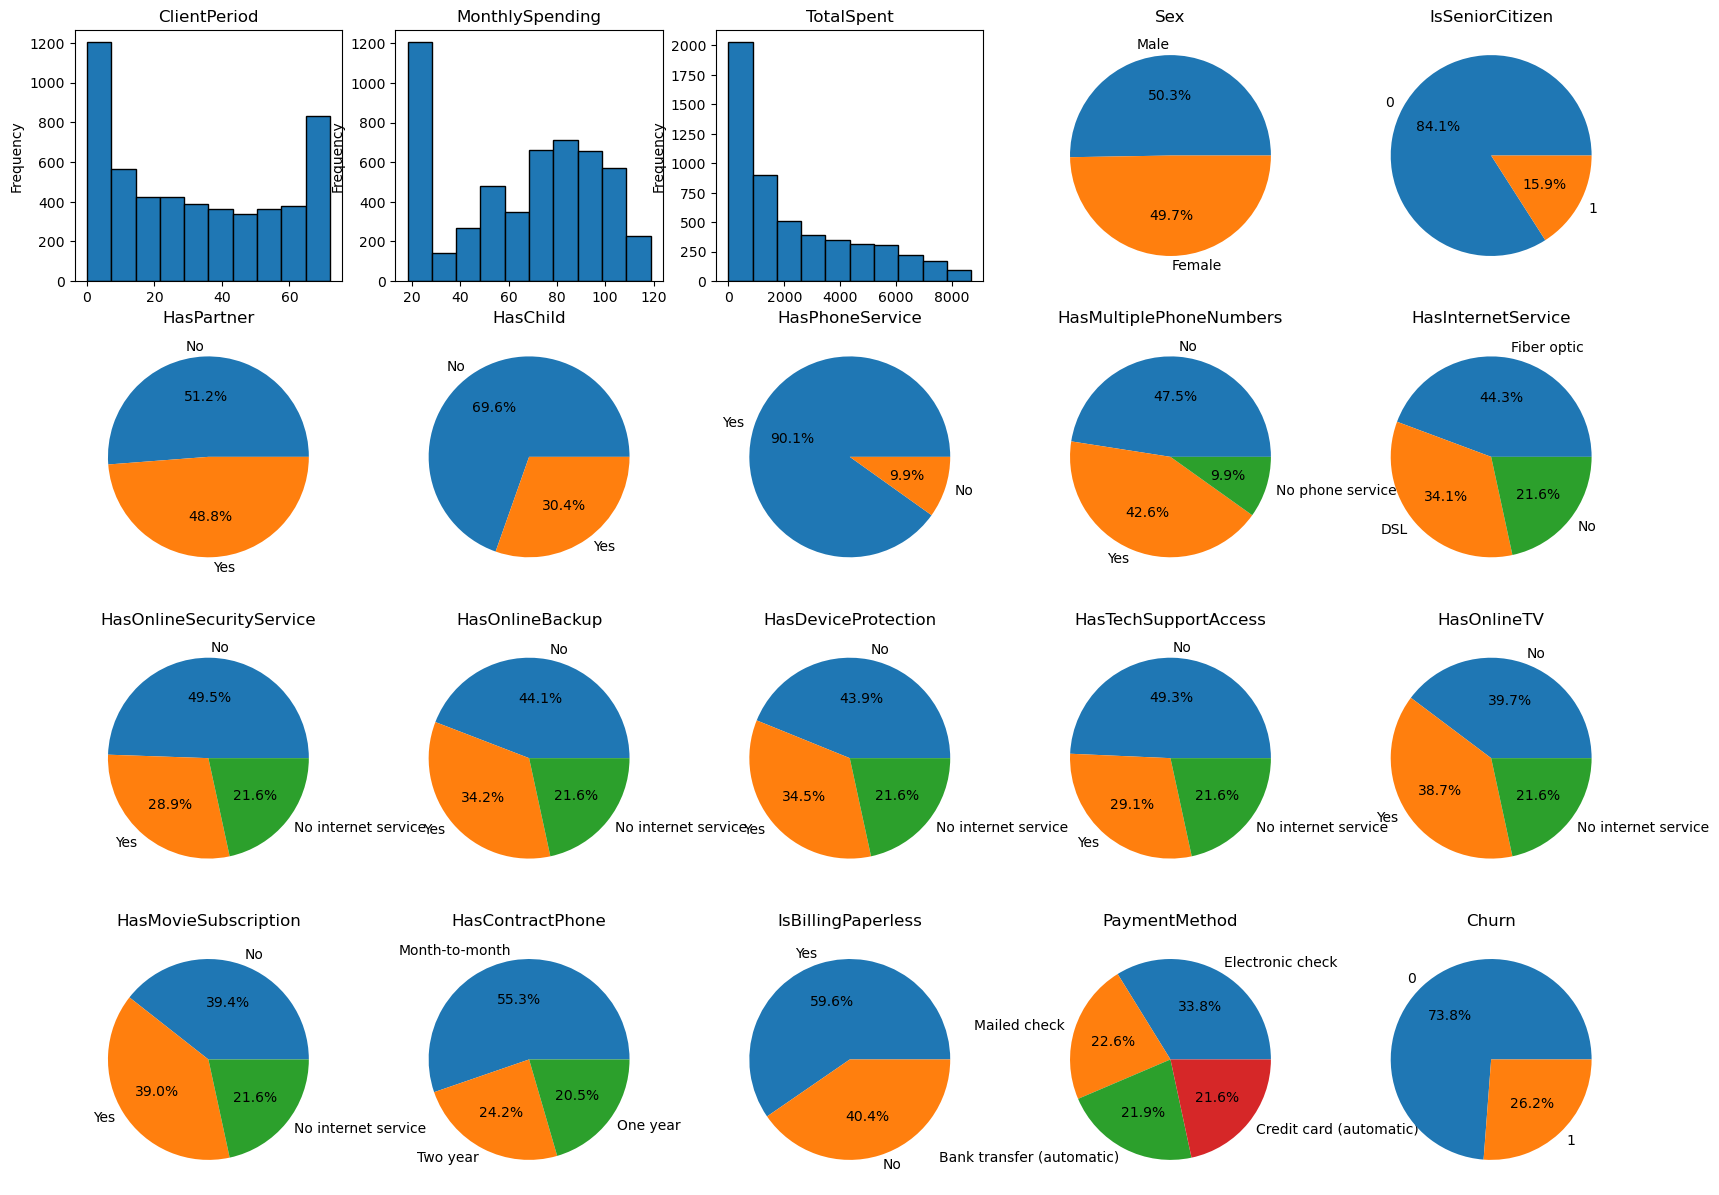

In [13]:
fig, axes = plt.subplots(4, 5, figsize=(20, 15))
for ax, col in zip(axes.flatten(), data.columns):
    ax.set_title(col)
    if col in cat_cols or col == target_col:
        ax.pie(data[col].value_counts(), autopct="%1.1f%%", labels=data[col].value_counts().index)
    else:
        data[col].plot(kind="hist", ec="black", ax=ax)

Посмотрим, как лояльность зависит от СlientPeriod: 

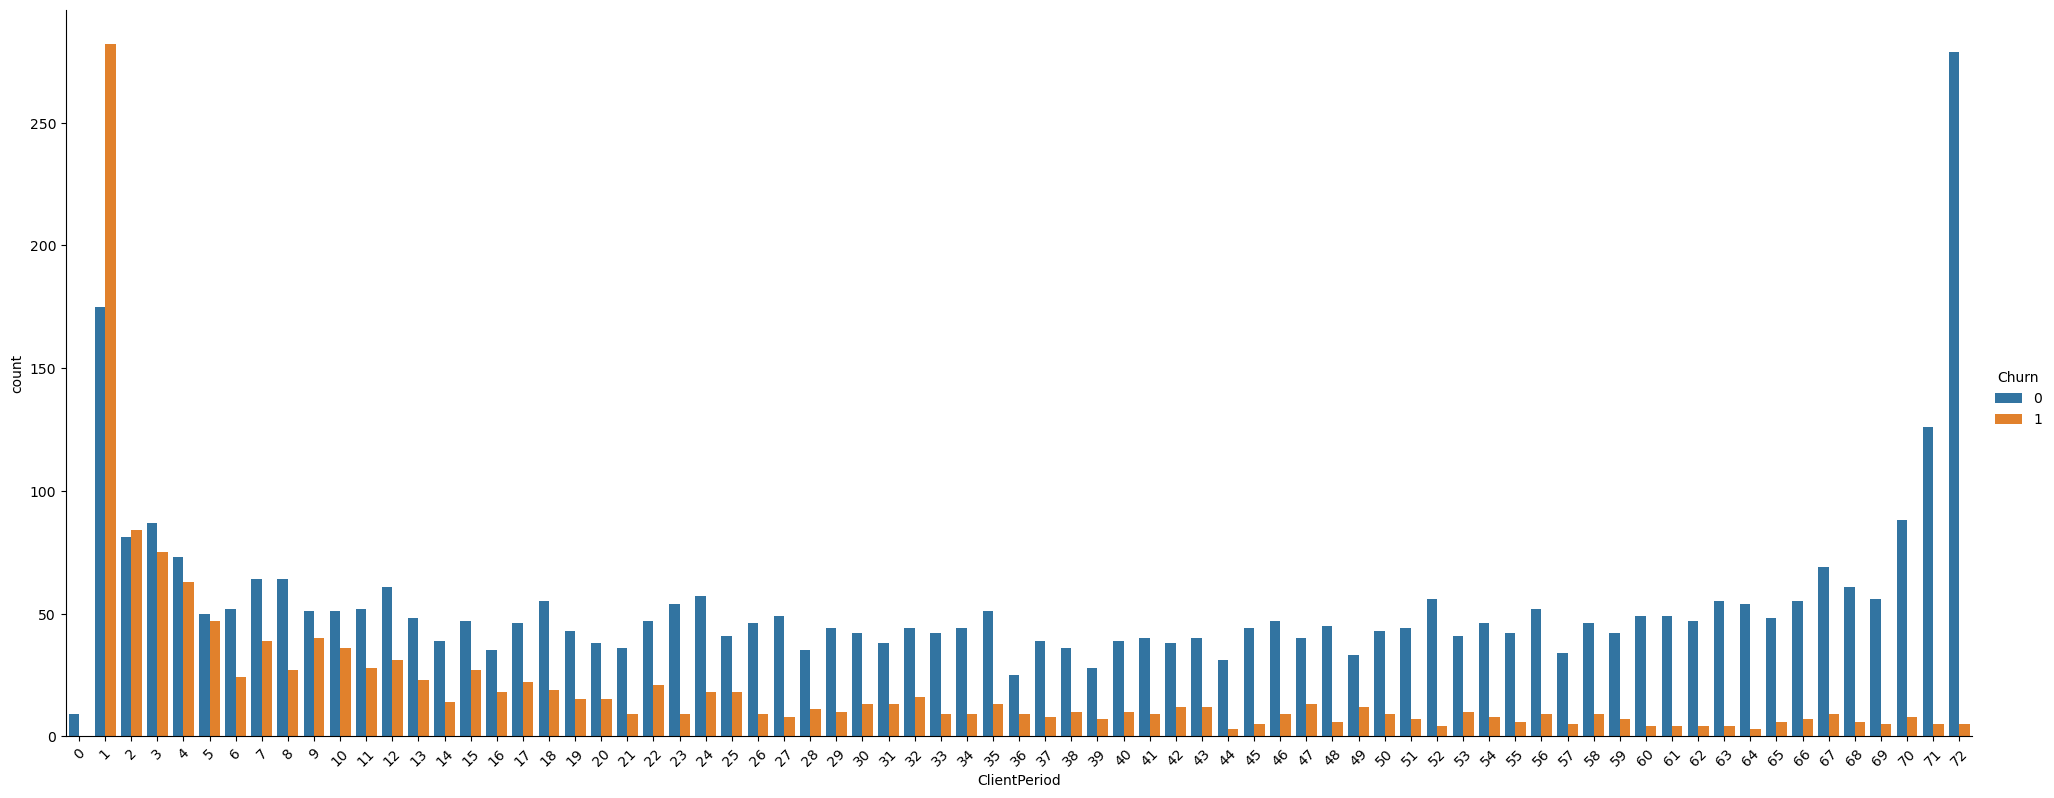

In [14]:
sns.catplot(data=data, x="ClientPeriod", hue="Churn", kind="count", height=8, aspect=20/8)
plt.xticks(rotation=45);

Видно, что новые пользователи склонны уходить в первый месяц. Постоянные же наоборот.

Преобразуем категориальные признаки. Значения Всем отрицаниям присвоим 0. Значения в «PaymentMethod» и «HadContractPhone» будут пронумерованы в соответствии с их корреляцией с оттоком. Двоичным значениям будут присвоены 0 и 1.

In [15]:
patterns = {
    "No": 0,
    "No internet service": 0,
    "No phone service": 0,
    "Yes": 1,
    "Male": 0,
    "Female": 1,
    "DSL": 1,
    "Fiber optic": 2,
    "Month-to-month": 0,
    "One year": 1,
    "Two year": 2,
    "Credit card (automatic)": 0,
    "Bank transfer (automatic)": 1,
    "Mailed check": 2,
    "Electronic check": 3,
}
X_train = data.replace(patterns).drop(target_col, axis=1)
y_train = data[target_col]
X_test = X_test.replace(patterns)

# Применение линейных моделей

one-hot-encoding

In [16]:
data_norm = ColumnTransformer([
        ('num_cols', StandardScaler(), num_cols),
        ('cat_cols', OneHotEncoder(), cat_cols)
    ])
pline = make_pipeline(data_norm, LogisticRegression())
param_grid = {
    'logisticregression__C': [350, 250, 100, 10, 1, 0.1, 0.01, 0.001],
    'logisticregression__penalty': ['l1', 'l2', 'elasticnet'],
    'logisticregression__max_iter': np.linspace(100, 300, 5)
}

gs = GridSearchCV(estimator=pline, param_grid=param_grid, scoring='roc_auc', refit=True, n_jobs=-1)
logreg = gs.fit(X_train, y_train)

C:\Users\Bulat\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
400 fits failed out of a total of 600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
200 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Bulat\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Bulat\anaconda3\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\Bulat\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalt

In [17]:
print(gs.best_score_, gs.best_params_, sep='\n')

0.8451315464333188
{'logisticregression__C': 350, 'logisticregression__max_iter': 100.0, 'logisticregression__penalty': 'l2'}


# KNN

In [18]:
numeric_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_cols),
        ("cat", OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ]
)
PARAMS = {
    "model__n_neighbors": [44],  
    "model__metric": ["manhattan"],  
}

clf = Pipeline(steps=[
    ("preproc", preprocessor),
    ("model", KNeighborsClassifier()),
])
    
grid_search = GridSearchCV(
    estimator=clf,
    param_grid=PARAMS,
    scoring="roc_auc",
    n_jobs=-1,
    cv=10,
    refit=True,
)
knn = grid_search.fit(X_train, y_train)

In [19]:
print(f"best score: {knn.best_score_}")
print(f"best params: {knn.best_params_}")

best score: 0.8347721646087625
best params: {'model__metric': 'manhattan', 'model__n_neighbors': 44}


# LogisticRegressionCV

In [20]:
std_scaler = StandardScaler()
log_reg_cv = LogisticRegressionCV(scoring='roc_auc')

cv = GridSearchCV(log_reg_cv, 
                  param_grid={
                      'penalty': ['l1', 'l2'],
                      'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag', 'saga'],
                  },
                  scoring='roc_auc',
                  refit=True,
                  n_jobs=-1,
                  verbose=0
)

lrcv = cv.fit(X_train, y_train)

C:\Users\Bulat\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Bulat\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Bulat\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 2031, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Bulat\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
Value

In [21]:
print(f"best score: {lrcv.best_score_}")
print(f"best params: {lrcv.best_params_}")

best score: 0.8454429850225631
best params: {'penalty': 'l2', 'solver': 'liblinear'}


# Random Forest

In [22]:
PARAMS = {
    "min_samples_split": [9], 
    "min_samples_leaf": [18], 
}
clf = RandomForestClassifier(n_estimators=200, random_state=42)

grid_search = GridSearchCV(clf, PARAMS, scoring="roc_auc", cv=5)
rf = grid_search.fit(X_train, y_train);

In [23]:
print(f"Best score: {rf.best_score_}")
print(f"Best params: {rf.best_params_}")

Best score: 0.8433171488881694
Best params: {'min_samples_leaf': 18, 'min_samples_split': 9}


# Catboost

In [34]:
catboost = CatBoostClassifier(
    cat_features=cat_cols,
    logging_level="Silent",
    eval_metric="AUC:hints=skip_train~false",
    grow_policy="Lossguide",
    metric_period=1000,
    random_seed=42,
    loss_function='CrossEntropy',
#     task_type='GPU',
    early_stopping_rounds=10
)

PARAMS = {
    "n_estimators": [300, 500, 700, 1000],  # [5, 10, 20, 30, 40, 50, 70, 100, 150, 200, 250, 300, 500, 1000],
    "learning_rate": [0.05],  # [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.02, 0.04, 0.05, 0.1, 0.2, 0.3, 0.5],
    "max_depth": [4],  # np.arange(4, 20, 1),
    "l2_leaf_reg": [10],  # np.arange(0.1, 1, 0.05),
    "subsample": [0.6],  # [3, 5, 7, 10],
#     "random_strength": [2, 5, 8],  # [1, 2, 5, 10, 20, 50, 100],
    "min_data_in_leaf": [100],  # np.arange(10, 1001, 10),
#     'task_type': ['GPU'],
#     'early_stopping_rounds': [10],
}
catboost.grid_search(PARAMS, X_train, y_train, cv=5, plot=True, refit=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	loss: 0.8699797	best: 0.8699797 (0)	total: 959ms	remaining: 2.88s


1:	loss: 0.8699797	best: 0.8699797 (0)	total: 2.04s	remaining: 2.04s


2:	loss: 0.8699797	best: 0.8699797 (0)	total: 3.1s	remaining: 1.03s


3:	loss: 0.8699797	best: 0.8699797 (0)	total: 4.13s	remaining: 0us
Estimating final quality...


{'params': {'min_data_in_leaf': 100,
  'depth': 4,
  'l2_leaf_reg': 10,
  'iterations': 300,
  'subsample': 0.6,
  'learning_rate': 0.05},
 'cv_results': defaultdict(list,
             {'iterations': [0, 133],
              'test-AUC-mean': [0.782039109960151, 0.8138327155635476],
              'test-AUC-std': [0.029550779919449457, 0.026172408818060405],
              'train-AUC-mean': [0.7876318467131396, nan],
              'train-AUC-std': [0.010675129582710592, nan],
              'test-CrossEntropy-mean': [0.6659010132218713, nan],
              'test-CrossEntropy-std': [0.0018962723981776435, nan],
              'train-CrossEntropy-mean': [0.6655655642843733, nan],
              'train-CrossEntropy-std': [0.0010664289826762116, nan]})}

In [37]:
print("Best score:", end=' ')
print(catboost.best_score_)
best_params = catboost.get_params()
for f in ("cat_features", "logging_level", "eval_metric"):
    best_params.pop(f)
print("Best params:", end=' ')
print(best_params)

Best score: {'learn': {'CrossEntropy': 0.37897344441115655, 'AUC': 0.874461892418522}}
Best params: {'loss_function': 'CrossEntropy', 'random_seed': 42, 'metric_period': 1000, 'early_stopping_rounds': 10, 'grow_policy': 'Lossguide', 'min_data_in_leaf': 100, 'depth': 4, 'l2_leaf_reg': 10, 'iterations': 300, 'subsample': 0.6, 'learning_rate': 0.05}


# Stacking

In [38]:
meta = CatBoostClassifier(
    logging_level='Silent',
    eval_metric="AUC:hints=skip_train~false",
    metric_period=1000,
    random_seed=0,
    grow_policy="Depthwise",
    l2_leaf_reg=1,
    learning_rate=0.08,
    max_depth=10,
    min_data_in_leaf=10,
    n_estimators=10,
    random_strength=11,
    subsample=0.1,
)
stacking = StackingClassifier(
    estimators=[
        ("logreg", logreg),
        ("knn", knn),
        ("rf", rf),
        ("lrcv", lrcv),
        ("catboost", catboost),
    ],
    final_estimator=meta,
    n_jobs=-1,
)

stacking.fit(X_train, y_train)

StackingClassifier(estimators=[('logreg',
                                GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                                                        ColumnTransformer(transformers=[('num_cols',
                                                                                                         StandardScaler(),
                                                                                                         ['ClientPeriod',
                                                                                                          'MonthlySpending',
                                                                                                          'TotalSpent']),
                                                                                                        ('cat_cols',
                                                                                                         OneHotEncoder(),
                 

In [39]:
best_model = stacking

In [40]:
y_pred = best_model.predict_proba(X_test)[:, 1]
submission = pd.read_csv('./submission.csv')
submission['Churn'] = y_pred
submission.to_csv("submission.csv", index=False)